IA & Data science (3i026) -- 2018-2019
--------
*&copy; Equipe pédagogique: Manon Ansart, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*


# TD-TME03: Programmation du kernel perceptron

Le but de ce TP est de terminer l'extension de l'algoritheme du perceptron à l'aide de noyaux, avant de commencer à étudier les données du projet.

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Cazes Hadrien,Sy Virak Bot Baramy

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-04</tt> et rajouter à la suite de <tt>tme-04</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-04-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">** à la fin de la séance**</font>. C'est ce compte-rendu qui donne la note de base de la séance.
- vous pouvez éventuellement compléter votre compte-rendu  pour obtenir des points bonus, dans ce cas, vous devez soumettre votre complément avant le début de la semaine suivante.

** Sur la page Moodle de remise du travail <font color="RED">ne pas oublier d'envoyer le compte rendu</font>** à la fin de la séance, la soumission de la version complémentaire post-séance se fera sur une page différente.

## Mise à jour de votre librairie IADS

Comme lors de la séance précédente, vous devez utiliser les fonctions de la librairie IADS.

<font color="RED" size="+1">**[Q]**</font> **Ouvrir et compléter les fichiers Classifiers.py et utils.py**

Rajouter dans la librairie les fonctions et classes et que vous avez écrites lors de la séance précédente. 

**Rappel**: dans un premier temps, vous devez écrire les classes et fonctions demandées dans le notebook de la séance de TDTME en cours. La séance suivante, vous rajouterez tout cela, une fois que vous l'aurez bien testé, dans vos fichiers de la librairie IADS.


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')

# Importation de la librairie iads
import iads as iads

# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut


Kernel Trick
--------------

Nous allons projeter (manuellement) les données 2D dans un espace de plus grande dimension. Voici un exemple de projection qui transforme un vecteur $(x_1,x_2)$ en un vecteur $(x_1,x_2,1)$

In [79]:
class KernelBias:
    def transform(self,x):
        y=np.asarray([x[0],x[1],1])
        return y

the_set = ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]), 40)

    
k=KernelBias()
k.transform(the_set.getX(1))


array([-0.98684557,  0.85327976,  1.        ])

<font color="RED" size="+1">**[Q]**</font> Implémenter la classe ClassifierPerceptronKernel qui prend un Kernel en paramètre, et calcule le perceptron sur la version "kernélisée" des données. Tester ce perceptron sur le dataset 1 (2 gaussiennes) et le dataset XOR.

In [80]:
class ClassifierPerceptronKernelST(cl.Classifier):
    def __init__(self,dimension_kernel,learning_rate,kernel, N, train_set, test_set):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        self.dimension_kernel = dimension_kernel
        self.learning_rate = learning_rate
        self.kernel = kernel
        self.w = np.random.rand(dimension_kernel) 
        self.N = N
        self.train_set = train_set
        self.test_set = test_set
        
    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        z = np.vdot(self.kernel.transform(x), self.w)
        if z > 0:
            return +1
        else:
            return -1
        
    
    def train(self):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        accuracies = []
        for j in range(self.N):
            i = np.random.randint(0, self.train_set.size())
            if (self.predict(self.train_set.getX(i)) * self.train_set.getY(i) <= 0):
                self.w = self.w + self.learning_rate * self.train_set.getY(i) * self.kernel.transform(self.train_set.getX(i))
            if j % 100 == 0:
                accuracies.append(self.accuracy(self.test_set))
        return accuracies


In [81]:
class ClassifierPerceptronKernelD(cl.Classifier):
    def __init__(self,dimension_kernel,learning_rate,kernel, N, train_set, test_set):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        self.dimension_kernel = dimension_kernel
        self.learning_rate = learning_rate
        self.kernel = kernel
        self.w = np.random.rand(dimension_kernel) 
        self.N = N
        self.train_set = train_set
        self.test_set = test_set
        
    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        z = np.vdot(self.kernel.transform(x), self.w)
        if z > 0:
            return +1
        else:
            return -1
        
    
    def train(self):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        accuracies = []
        for j in range(self.N):
            for i in range(self.train_set.size()):
                if (self.predict(self.train_set.getX(i)) * self.train_set.getY(i) <= 0):
                    self.w = self.w + self.learning_rate * self.train_set.getY(i) * self.kernel.transform(self.train_set.getX(i))
                if j % 100 == 0:
                    accuracies.append(self.accuracy(self.test_set))
        return accuracies


[0.44137189 1.16614676] [1]


0.875

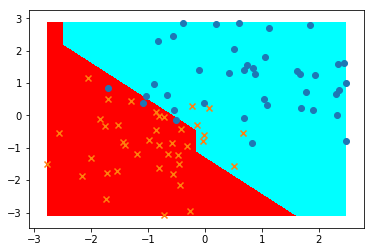

In [82]:
learn_set = ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]), 40)
test_set = ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]), 40)
print(learn_set.getX(0), learn_set.getY(0))
k = KernelBias()
N = 1000
p = ClassifierPerceptronKernelST(3, 0.001, k, N, learn_set, test_set)

p.train()

ut.plot_frontiere(test_set,p)
ut.plot2DSet(test_set)
p.accuracy(test_set)



In [97]:
learn_set = ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]), 40)
test_set = ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]), 40)

k = KernelBias()
N = 100
p = ClassifierPerceptronKernelST(3, 0.001, k, N, learn_set, test_set)

accuracies = p.train()
print(accuracies)


[0.8]


[0.825, 0.825, 0.84, 0.845, 0.845, 0.855, 0.86, 0.865, 0.865, 0.87]


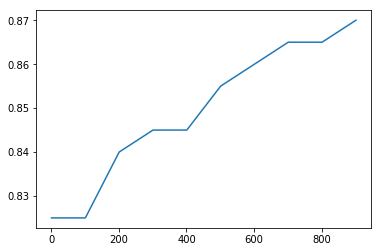

In [84]:
learn_set = ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),500)
test_set = ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),100)
N= 1000
p =  ClassifierPerceptronKernelST(3, 0.001, KernelBias(), N, learn_set , test_set)
    
x_values = range(1,N+1, 100)

y_values = p.train()
print(y_values)

plt.plot(x_values, y_values)
plt.show()

<font color="RED" size="+1">**[Q]**</font> Implémenter le kernel : $(x_1,x_2) \rightarrow (1,x_1,x_2,x_1*x_1,x_2*x_2,x_1*x_2)$. Entrainer le perceptron correspondant sur le XOR. Que constatez-vous ? Donnez une explication (explication donnée en cours lors de la prochaine séance)

0.5

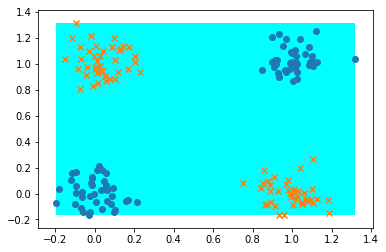

In [96]:
class KernelPoly:
    def transform(self,x):
        y = np.asarray([1, x[0], x[1], x[0]*x[0], x[1]*x[1], x[0]*x[1]])
        return y

N=100
k=KernelPoly()




##TESTER SUR XOR ET DESSINER LA FRONTIèRE DE DECISION

learn_xor=ut.createXOR(100,0.01)
test_xor=ut.createXOR(40,0.01)

perceptron_k=ClassifierPerceptronKernelST(6,0.001,k, N, learn_xor, test_xor)
perceptron_k.train()

ut.plot_frontiere(test_xor,perceptron_k, 20)
ut.plot2DSet(test_xor)
perceptron_k.accuracy(test_xor)


In [86]:
class ClassifierMCST(cl.Classifier):
    def __init__(self,dimension_kernel,learning_rate,kernel, N, train_set, test_set):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        self.dimension_kernel = dimension_kernel
        self.learning_rate = learning_rate
        self.kernel = kernel
        self.w = np.random.rand(dimension_kernel) 
        self.N = N
        self.train_set = train_set
        self.test_set = test_set
        
    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        z = np.vdot(self.kernel.transform(x), self.w)
        if z > 0:
            return +1
        else:
            return -1
        
    
    def train(self):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        accuracies = []
        for j in range(self.N):
            i = np.random.randint(0, self.train_set.size())
            
            self.w = self.w + self.learning_rate * 2 *self.kernel.transform(self.train_set.getX(i)) * (self.train_set.getY(i)- self.predict(self.train_set.getX(i)))
            if j%10 == 0:
                accuracies.append(self.accuracy(self.test_set))
        return accuracies

In [87]:
class ClassifierMCD(cl.Classifier):
    def __init__(self,dimension_kernel,learning_rate,kernel, N, train_set, test_set):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        self.dimension_kernel = dimension_kernel
        self.learning_rate = learning_rate
        self.kernel = kernel
        self.w = np.random.rand(dimension_kernel) 
        self.N = N
        self.train_set = train_set
        self.test_set = test_set
        
    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        z = np.vdot(self.kernel.transform(x), self.w)
        if z > 0:
            return +1
        else:
            return -1
        
    
    def train(self):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        accuracies = []
        for j in range(self.N):
            for i in range(self.train_set.size()):
                self.w = self.w + self.learning_rate * 2 *self.kernel.transform(self.train_set.getX(i)) * (self.train_set.getY(i)- self.predict(self.train_set.getX(i)))
            if j%10 == 0:
                accuracies.append(self.accuracy(self.test_set))
        return accuracies

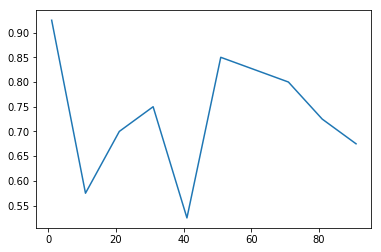

0.5

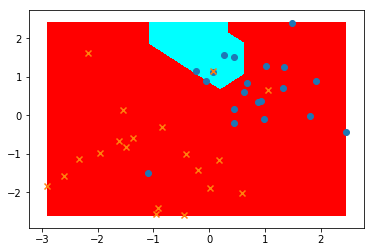

In [88]:
learn_set = ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),100)
test_set = ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),20)
N= 100
mcd = ClassifierMCD(6,0.01,KernelPoly(),N,learn_set,test_set)
y_values = mcd.train()
x_values = range(1,N+1,10)
plt.plot(x_values,y_values)
plt.show()

ut.plot_frontiere(test_set,mcd, 20)
ut.plot2DSet(test_set)
perceptron_k.accuracy(test_set)


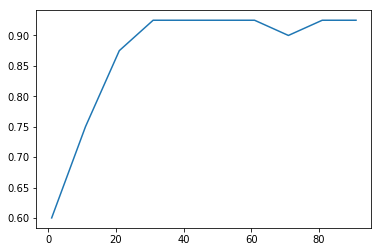

In [89]:
mc = ClassifierMCST(6,0.01,KernelPoly(),100,learn_set,test_set)
y_values = mc.train()
x_values = range(1,101,10)
plt.plot(x_values,y_values)
plt.show()



Mise en oeuvre sur des données réelles 
-------
A partir de datasets trouvés sur le web, réaliser un ensemble d'expérimentations permettant de comparer les 3 classifiers (knn, perceptron de Rosenblatt et version kernélisée) que vous avez implémentés.

Par exemple, vous pouvez utiliser les datasets suivants:
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra
- https://www.kaggle.com/uciml/indian-liver-patient-records
- voir sur les données ouvertes de Paris : https://opendata.paris.fr/explore/?sort=modified

Afin d'utiliser de tels jeux de données, il sera certainement nécessaire que vous réalisiez un prétraitement afin de pouvoir utiliser vos implémentations.

In [90]:
data = pd.read_csv('./dataR2.csv')

In [91]:
data.shape

(116, 10)

In [92]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [93]:
data.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [94]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


# Préparation du projet

Le projet est à rendre lors de la dernière séance de TD-TME de votre groupe qui aura lieu la semaine du **16 avril**. Lors de cette dernière séance, une soutenance sera organisée afin que vous présentiez le travail réalisé et les résultats obtenus.



## Données

Les données à utiliser sont des données issues d'une base de films et de notations faites par des spectateurs:
- base MovieLens : https://grouplens.org/datasets/movielens/
- base complémentaire `Movie Industrie`: https://www.kaggle.com/danielgrijalvas/movies


<font color="RED">**ATTENTION**: la base est très volumineuse (plus d'1Go) et ne pourra pas tenir sur votre répertoire de travail des machines de TME.</font>

Dans un premier temps, vous travaillerez sur la version réduite de cette base (`ml-latest-small.zip` sur le site movilens) que vous pouvez récupérer sur les machines de TD-TME: `/users/Enseignants/marsala/3i026-2019/MovieLens-small.tgz`
Cette version contient qu'une partie des lignes de la base originale.



En salle de TD-TME, vous accéderez aux données dans les fichiers suivants (à ne pas recopier !):
- répertoire : `/users/Enseignants/marsala/3i026-2019`
- répertoire des données MovieLens version réduite : `/users/Enseignants/marsala/3i026-2019/MovieLens-small/` 
- fichier archive avec les données MovieLesns version réduite : `/users/Enseignants/marsala/3i026-2019/MovieLens-small.tgz`
- répertoire des données MovieLens : `/users/Enseignants/marsala/3i026-2019/MovieLens/` 
  Il contient les fichiers CSV que vous pouvez ouvrir directement dans le notebook.
- fichier `/users/Enseignants/marsala/3i026-2019/kaggle-movies.csv` : infos sur les films de la base Movie Industrie
   
   
  




<font color="RED" size="+1">**[Q]**</font> Réaliser des expérimentations avec la base MovieLens version réduite.

Charger les données dans un dataframe, afficher des informations statistiques sur les données, commencer à réfléchir comment appliquer les classifieurs vus dans les séances précédentes sur ces données...